# Problem: 

The marketing team in Nedbank ran a marketing campaign and recorded who
successfully responded to the campaign (where a “success” means they took up the
product). They used a “shotgun” approach, meaning they targeted clients at random.
Since the campaign required the marketing team to call each client individually, they
wanted to save time by only contacting the clients who are “most likely” to take up
the product.
The Advanced Analytics (AA) team told them that a model could be developed that
could look at their previous campaign and determine which clients are most likely to
take up the product. This would allow them to contact clients that have a high
likelihood of taking up the product - resulting in a higher hit rate.
Your task is to create this model. You will have been supplied with a cleaned dataset
(bank_marketing_data.csv) of clients that were targeted in the marketing campaign.
The feature ‘target’ indicates if the call was a success or not.
To do this, you must ingest the data and feed it through three classification models –
SVM, Logistic Reg and k-NN – that will predict the outcome. Once you have results
for each, choose an appropriate visualisation to communicate your model
performances. The accuracy/precision/quality of your model will not be taken into
consideration (no need to tune hyperparameters).

# Designs and Overview of MLOps

##### The below diagram gives a brief overview of the flow from source till deployment, support and maintance

    

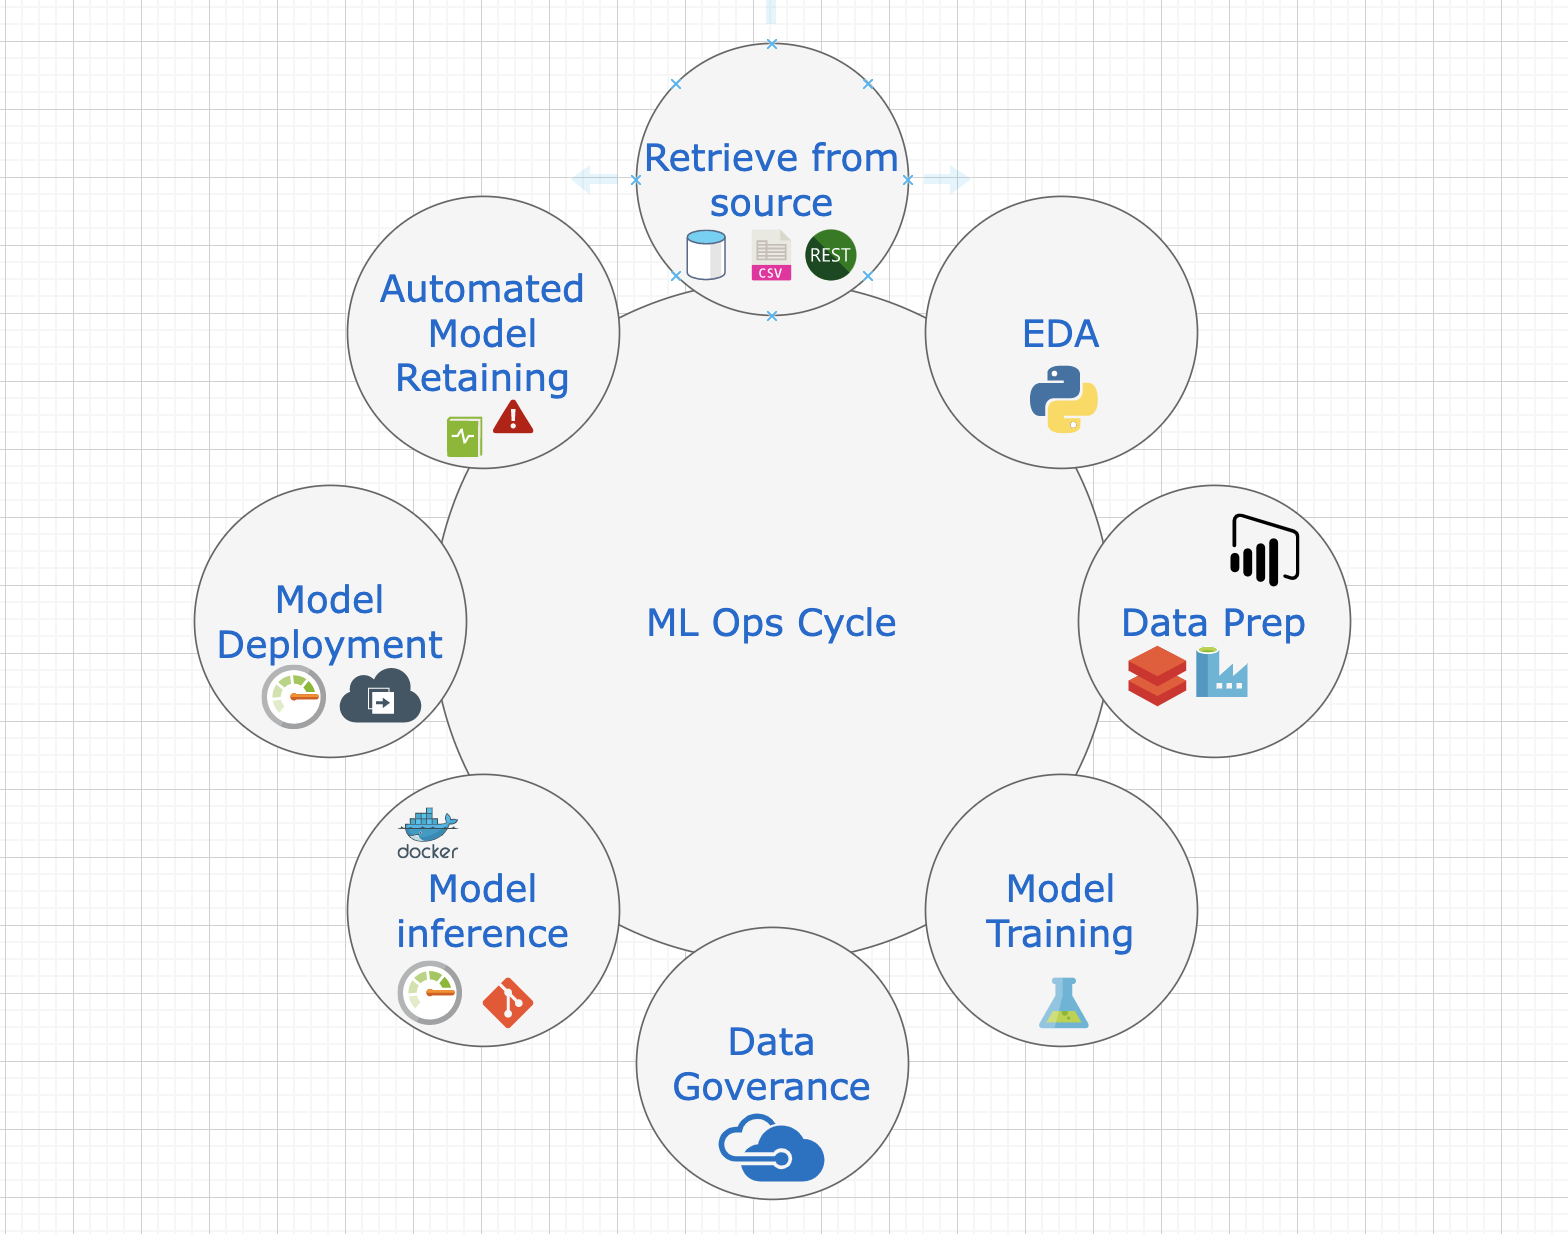

## Components for solution on a wide scale:
1. Compute - AKS for each environment DEV, ETE, QA, Pre-Prod, Prod , Docker Containers and Virtual Machines 
2. Development - AzureDevOps
3. Database - SQL Database or Database for PostgresSQL and 
4. Identity + Security - Azure Key Vault
5. AI & Machine learning - AzureML
6. Analytics - Data Lake Analytics, Databricks
7. Integration - Logic Apps
8. Management + Govenance - Azure Monitor and Azure Policy
9. Storage Azure - Azure Storage and Data Lake Storage 
10. Error logging - ELP(elastic stack) and Dynatrace

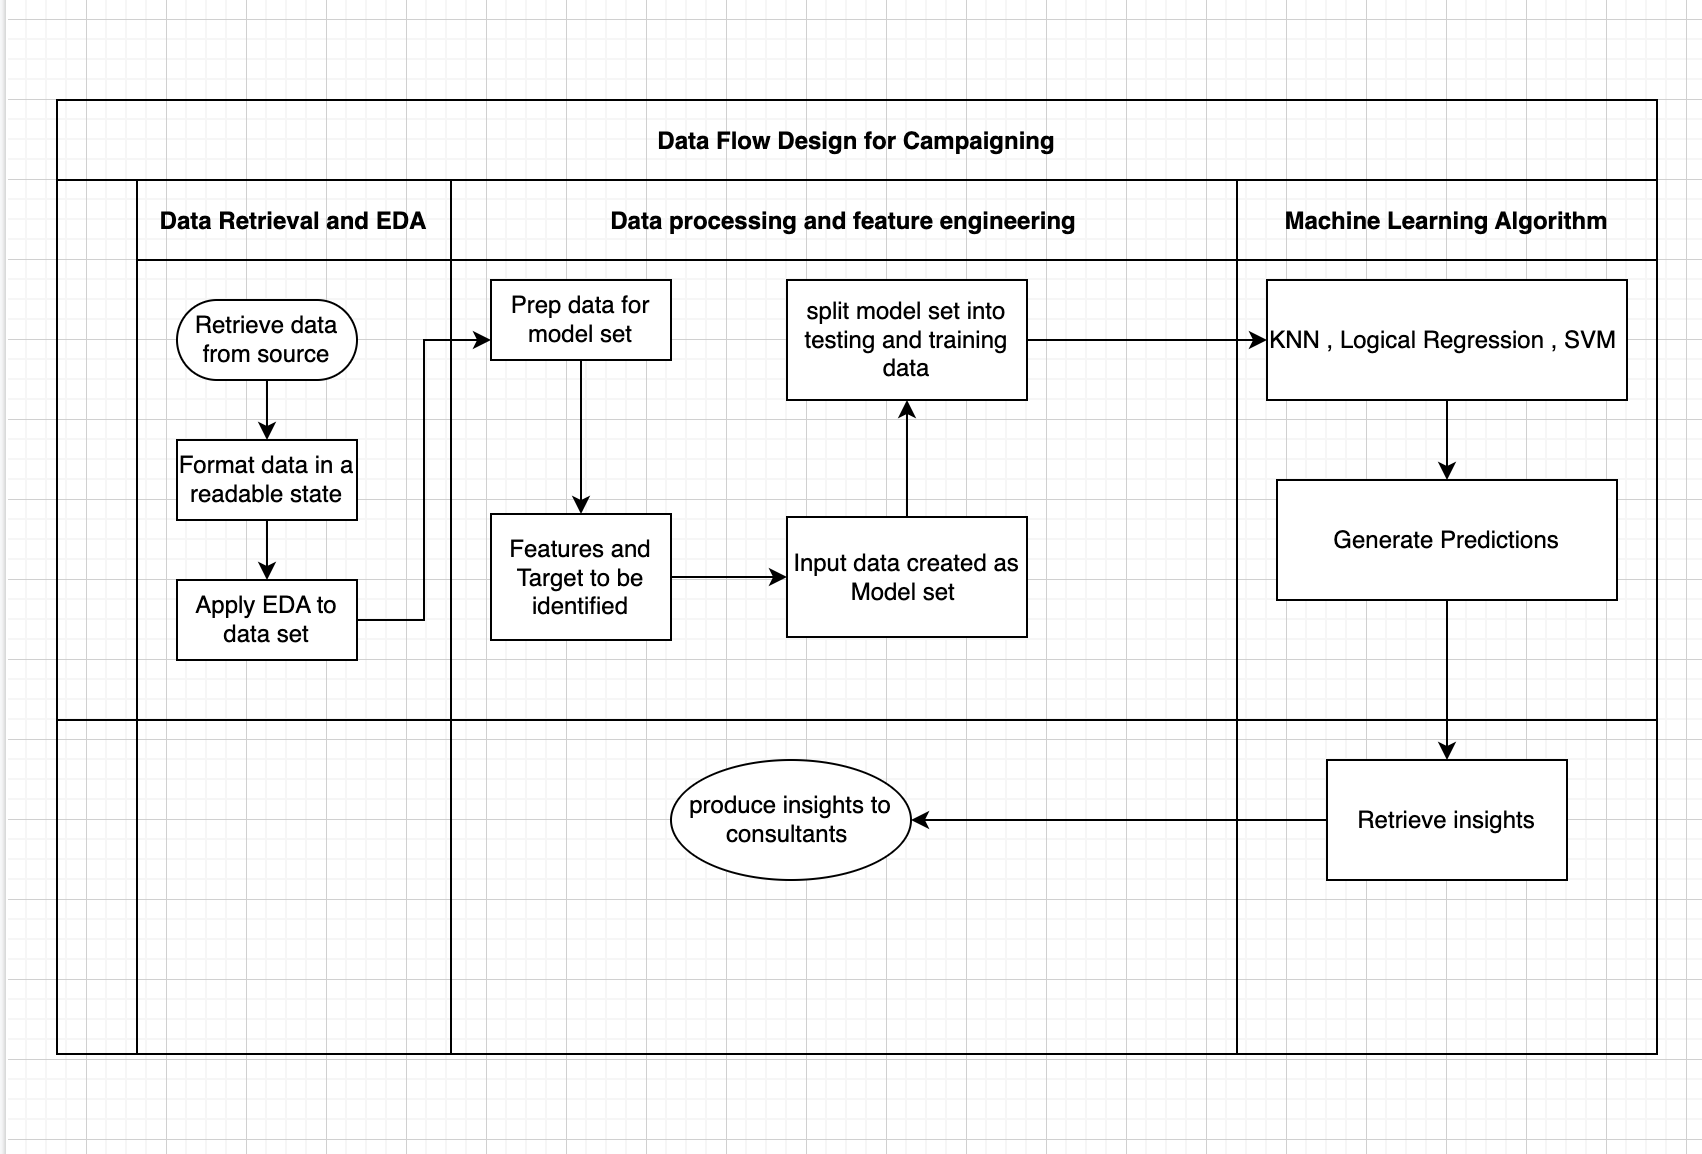

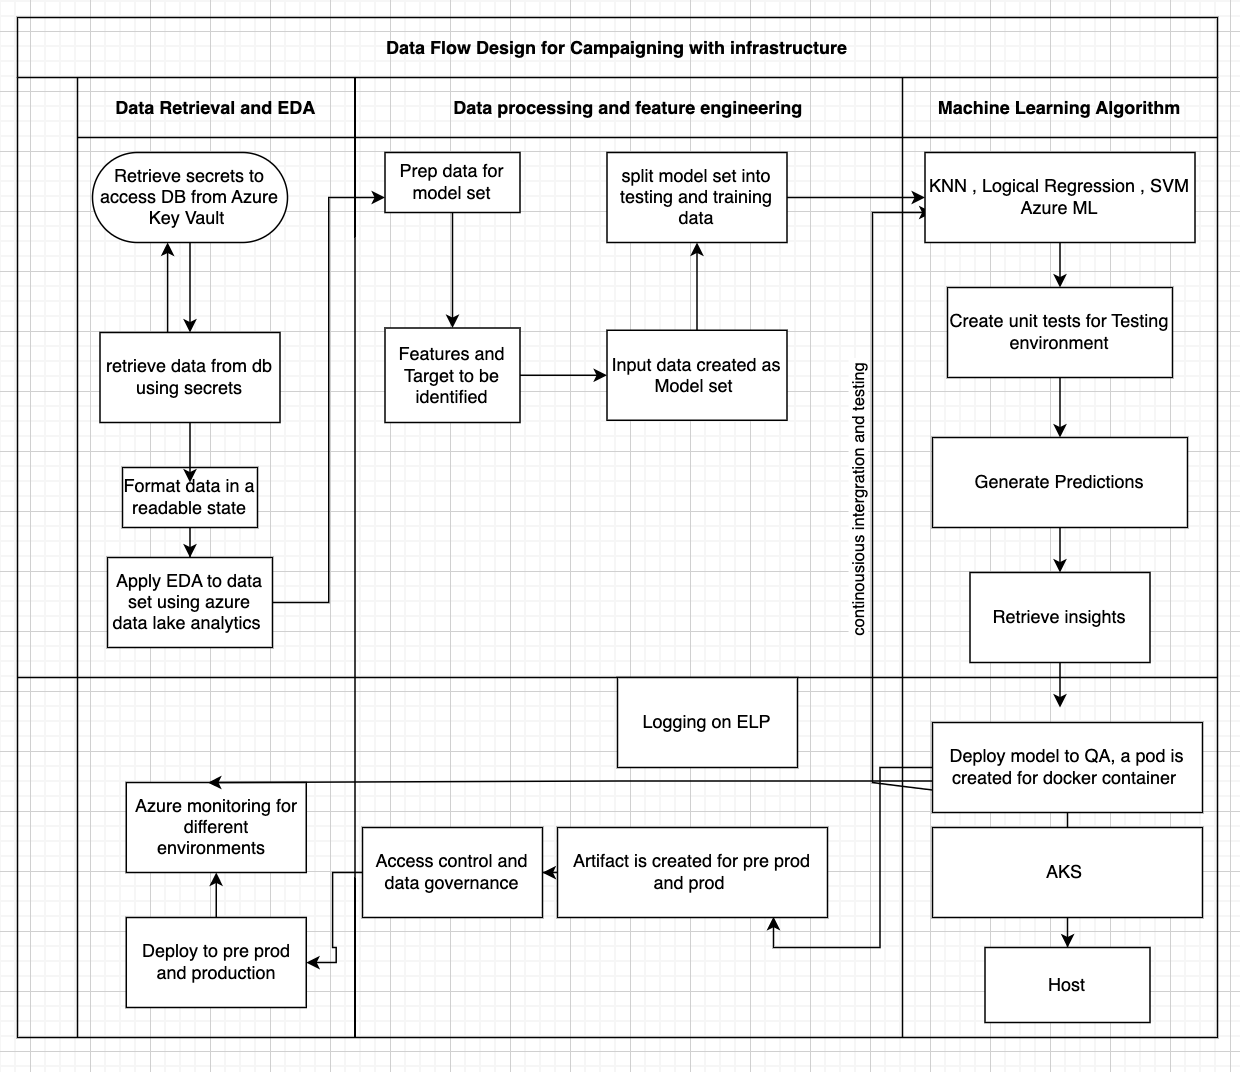

#### There are many ways in which you can handle your product(model) and how it gets developed and deployed.
#### The most important part is that you follow a certain standard that is set either by your company or traditional standasrd that are set generally for machone learning and data science.
#### The above diagram I tried to add some indication of what infrustructure you will need. Here is some details regarding the design.
1. As you can see the first step I added was a key vault, usually we retrieve sensitive data from a database because we are working with a cloud solution we are using azure and all azure products. The key vault stores secrets that you can trieve to access the database you will either need a clientid or tenant id to communicate with the vault depending on what implementation you go with. The key vault serves as a security layer as we would not want to store credentials to the db either on config or on the azure dev ops liabrary as a environmental variable as it is a security risk.
2. Once you have access to the db and able to retrieve the data we move on to EDA, to fasten up the process either using Azure data lake analytics or a package that can do the first level of EDA for you so that you can select the variables you want to deepdive into.
3. This is where you start your data processing and feature engineering.
4. Once completed start with your model building, this is not a once step process as above I indicate that it's continous integration meaning that you build your model and create your unit testing deploy to your testing environments and test your model, make changing if needed (tune model) test (locally or in dev) deploy until model met the definition of ready for production.
5. Deployment process: as this will be sitting on AKS the deployment will go as follows:
   - Code will be developed on a feature branch then it will be commited and pushed in that feature branch (follow gitflow)
     you will then make a pull request for code to be reviewed and approved before merged into develop or main.
   - Once code has been merged either a automatic build will kick off or you will have to physically "run pipeline" so that your 
     model can build. Once build is sucessful you may deploy. A security layer will be put on the deployment process where only        certain users on AzurDevOps can approve, you are not allowed to approve your own code nor approve your own deployment unless      you have complete rights. This security layer also access as a type of goverance so that the right build gets deployed to the      targeted environment.
6. A pod is created when deployed for the docker container that sits on AKS and AKS with sit on some type of host.
7. For each environment monitoring and loging needs to be incorporated. Example if your model starts differing in production we 
   will need an alert system. We will use dynatrace,ELK and Azure monitoring.

#### I incorporated some programming standards by creating helper functions so that our main file can stay clean.
#### All the necessary code can be found in the helper_functions file.

In [1]:
import helper_functions as hf

#### This is a package I came across that assist with visualising the raw data that was retrieved from the csv file, it will open in a separate tab, it is basic html and is interactive as well can it be downloaded.

In [2]:
hf.generate_eda_report(hf.mk_data)

  0%|          | 0/5632 [00:00<?, ?it/s]

#### Based on the data visualization it is clear that the data we are working with is skewed we see that ±88% of targets resulted in a NO therefore the model will work more in favor of predicting what customer will say NO rather than yes. We see that 'Education', 'Job title' and 'Month' has a good correlation to the target therefore could be a good predictor of an outcome variable.
#### We also see that most of the customers ages are in the ranges of 18-30 and 30-40

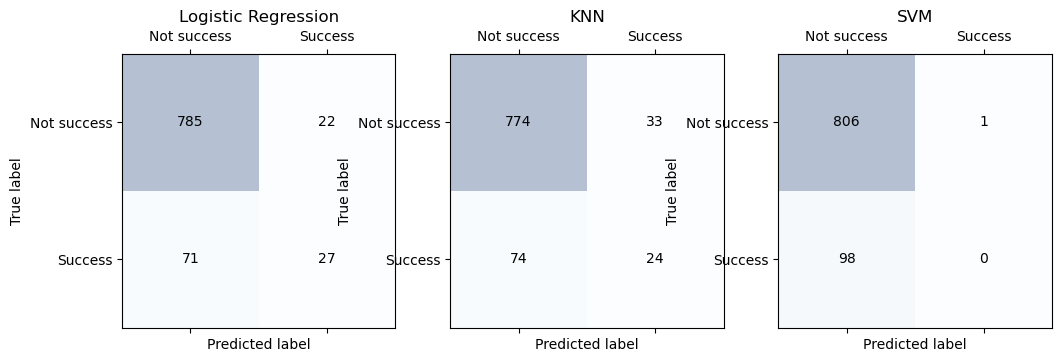

In [3]:
hf.results_of_data()